# Churn Prediction
Churn Prediction is one of the most popular big data use cases in the business world, and it helps identify customers who are most likely to cancel a subscription to a service.

(If Churn = 1, customer canceled subscription. If Churn = 0, customer continues subscription.)

# Data Used

For this analysis, the open source Cell2Cell data prepared by the Teradata center for customer relationship management at Duke University was obtained from Kaggle.

Our data consists of 51,047 samples / rows and 58 features / columns.

# Purpose of the study

Tried to predict and analyzed Customer Loss with classification algorithms.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from warnings import filterwarnings
filterwarnings('ignore')
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.8 MB/s 
     |████████████████████████████████| 209 kB 79.2 MB/s 
     |████████████████████████████████| 81 kB 10.4 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 147 kB 92.8 MB/s 
     |████████████████████████████████| 112 kB 94.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=a45eb4c269dcfd109804eb5e01cc5ea85c29ba279800af4cdb7fa60469db149b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
df=pd.read_csv('cell2celltrain.csv')


In [3]:
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [4]:
for i in df.columns:
      if df[i].dtype=='object':
            print(pd.DataFrame(df[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1684
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
OHIRAV330            1
OMANEW515            1
KCYHES316            1
AIRGEO843            1
NCRDNN910            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     Ha

# Data Analysis


In [5]:
df.drop('CustomerID',axis=1, inplace=True)

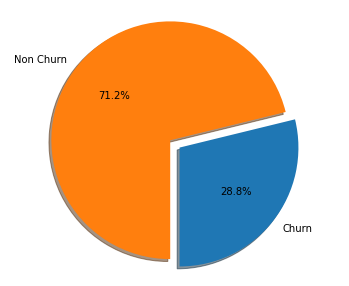

In [6]:
churn=df[df['Churn']=='Yes'].shape[0]
non_churn= df[df['Churn']=='No'].shape[0]

slices=[churn,non_churn]
labels=['Churn','Non Churn']
explode=[0.1,0]

fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()


# Customer churn is 28.8%. The data is unbalanced.

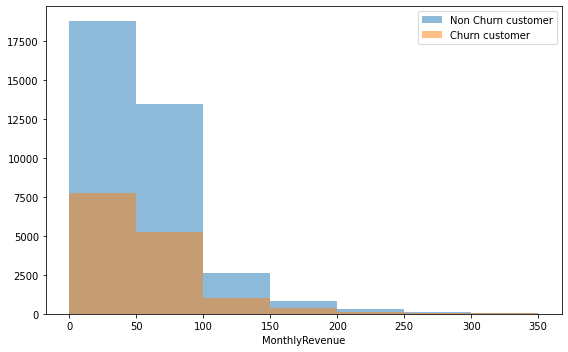

In [7]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(df[df['Churn']=='No']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5, label='Non Churn customer')
plt.hist(df[df['Churn']=='Yes']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5,label='Churn customer')
plt.xlabel("MonthlyRevenue")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
tenure_churn = df.MonthsInService[df.Churn == 'Yes'].value_counts()
tenure_no_churn = df.MonthsInService[df.Churn == 'No'].value_counts()
tenure = pd.merge(tenure_churn.reset_index(), tenure_no_churn.reset_index(), on='index')
tenure = tenure.sort_values(by='index')
tenure = tenure.reset_index().drop(columns='level_0')
tenure.columns

Index(['index', 'MonthsInService_x', 'MonthsInService_y'], dtype='object')

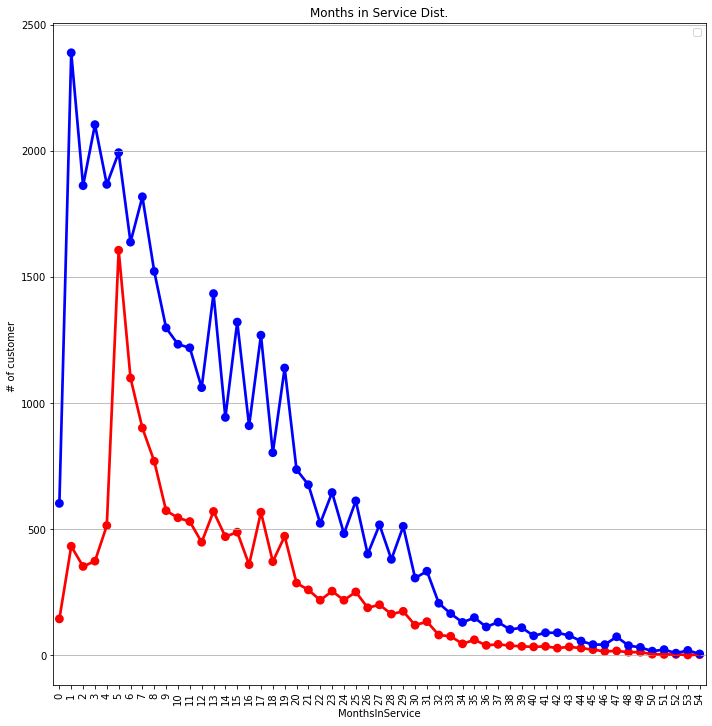

In [9]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_x, color='red',label='Churn customer')
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_y, color='blue',label='Non Churn customer')
plt.xticks(rotation=90)
plt.ylabel("# of customer ")
plt.xlabel("MonthsInService")
plt.legend()
plt.tight_layout()
plt.title('Months in Service Dist.')
plt.show()

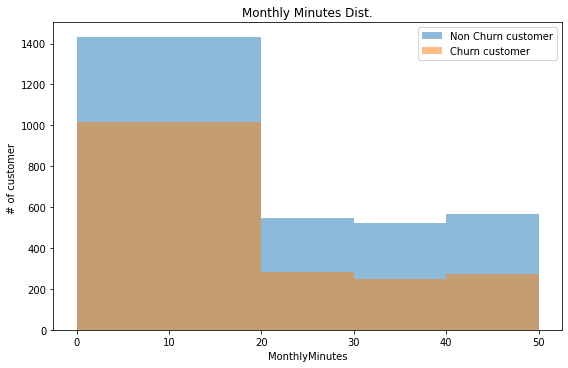

In [10]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(df[df['Churn']=='No']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5, label='Non Churn customer')
plt.hist(df[df['Churn']=='Yes']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5,label='Churn customer')
plt.ylabel("# of customer ")
plt.xlabel("MonthlyMinutes")
plt.legend()
plt.tight_layout()
plt.title('Monthly Minutes Dist.')
plt.show()

In [11]:
df['HandsetPrice'] = df['HandsetPrice'].replace('Unknown', np.nan)


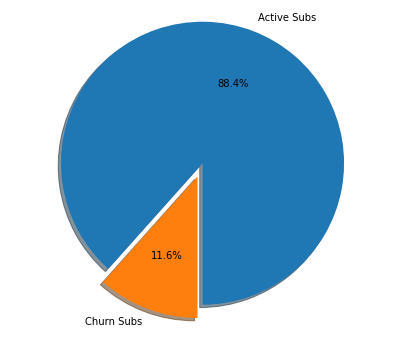

In [12]:
#The customer can have multiple subscriptions and can close one of the subscriptions.

df['ChurnSubs']=df['UniqueSubs']-df['ActiveSubs']


# There are no columns in the data set indicating the loss of subscription (ChurnSubs).
# This column is obtained when active subscriptions are subtracted from the number of subscriptions owned by the customer.

slices=[df['ActiveSubs'].sum(),df['ChurnSubs'].sum()] 
labels=['Active Subs','Churn Subs']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()


# Pie chart used to show how many subscribers are active and how many have lost subscribers

Number of customers making calls to retention team: 1745
Number of customers lost after calls : 786
Number of customers not lost after making calls : 959
Success rate of retention calls % : 55


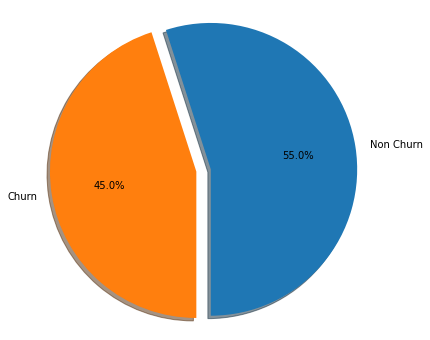

In [13]:
retention_df=df[df['MadeCallToRetentionTeam']=='Yes']
print ("Number of customers making calls to retention team: {}".format(df[df['MadeCallToRetentionTeam']=='Yes'].shape[0]))
print("Number of customers lost after calls : {}".format(df[(df['MadeCallToRetentionTeam']=='Yes') & (df['Churn']=='Yes')].shape[0]))
print("Number of customers not lost after making calls : {}".format(df[(df['MadeCallToRetentionTeam']=='Yes') & (df['Churn']=='No')].shape[0]))
print ("Success rate of retention calls % : {}".format(round(100*560/1017)))

slices=[retention_df[retention_df['Churn']=='No'].shape[0],retention_df[retention_df['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()


In [14]:
retention_offer=df[df['RetentionOffersAccepted']>0]

The number of customers who accepted the retention call offer : 881
Number of customers lost after accepting the retention call: 362
Number of customers not lost after accepting the retention call : 519
Success rate of the retention call proposal: 0.5891032917139614


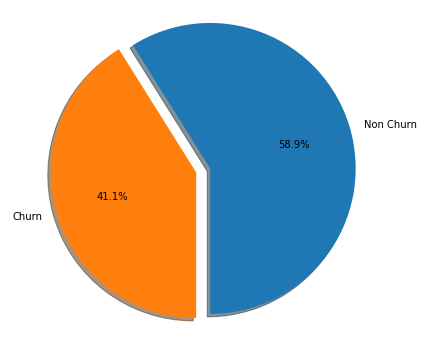

In [15]:
print("The number of customers who accepted the retention call offer : {}".format(retention_offer.shape[0]))
print("Number of customers lost after accepting the retention call: {}".format(retention_offer[retention_offer['Churn']=='Yes'].shape[0]))
print("Number of customers not lost after accepting the retention call : {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]))
print("Success rate of the retention call proposal: {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]/retention_offer.shape[0]))

slices=[retention_offer[retention_offer['Churn']=='No'].shape[0],retention_offer[retention_offer['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()



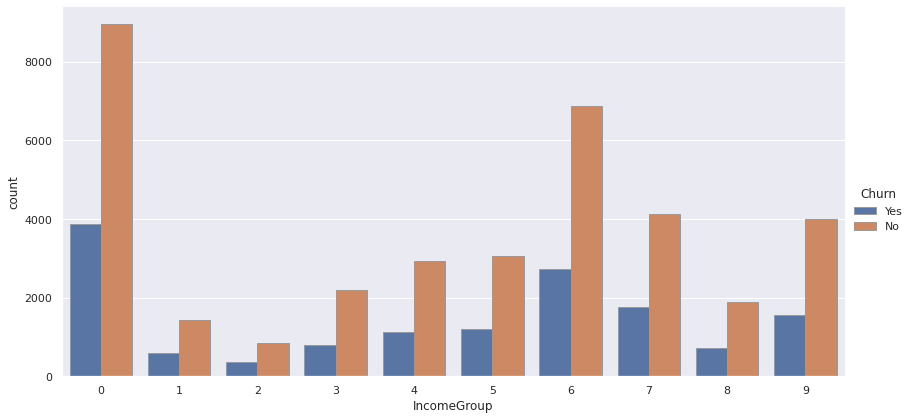

In [16]:
sns.set(style="darkgrid")
sns.catplot(x="IncomeGroup", hue="Churn", kind="count", edgecolor=".6",
            data=df,height=6, aspect=2);

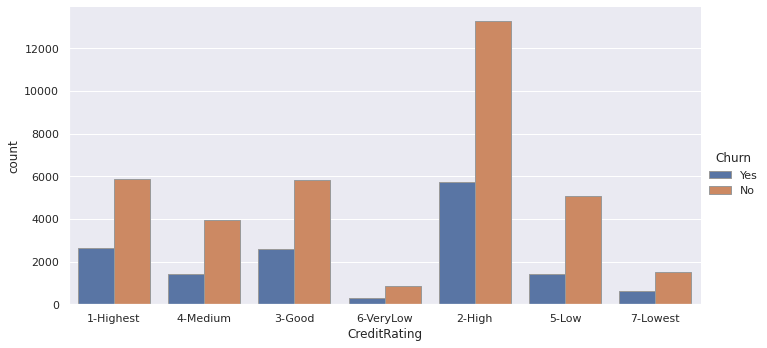

In [17]:
sns.set(style="darkgrid")
sns.catplot(x="CreditRating", hue="Churn", kind="count", edgecolor=".6",
            data=df,height=5, aspect=2);

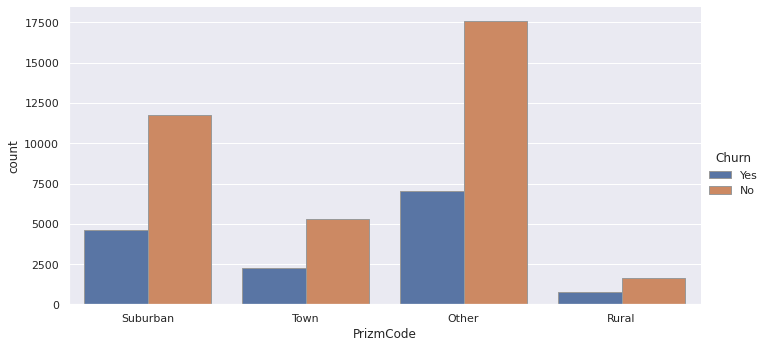

In [18]:
sns.set(style="darkgrid")
sns.catplot(x="PrizmCode", hue="Churn", kind="count", edgecolor=".6",
            data=df,height=5, aspect=2);


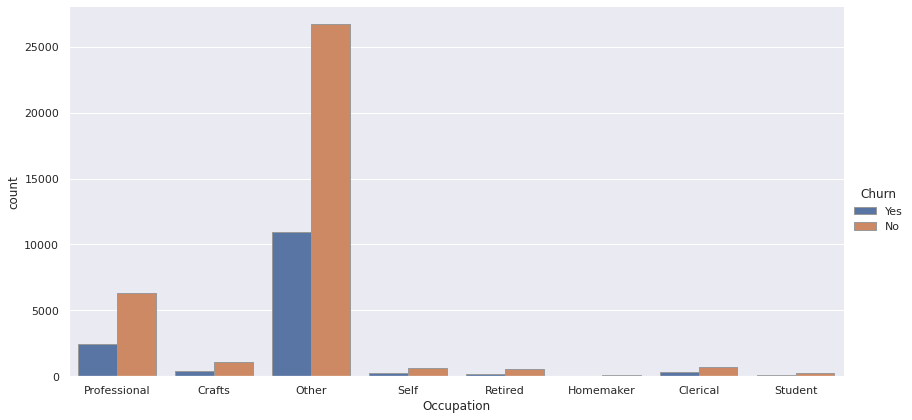

In [19]:
sns.set(style="darkgrid")
sns.catplot(x="Occupation", hue="Churn", kind="count", edgecolor=".6",
            data=df,height=6, aspect=2);


In [20]:
print("Categorical Var. : {}".format(df.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(df.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')
Numeric Var. : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'Active

# Missing Values

In [21]:
df.columns[df.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'],
      dtype='object')

In [22]:
train_missings=df.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'], axis=1)

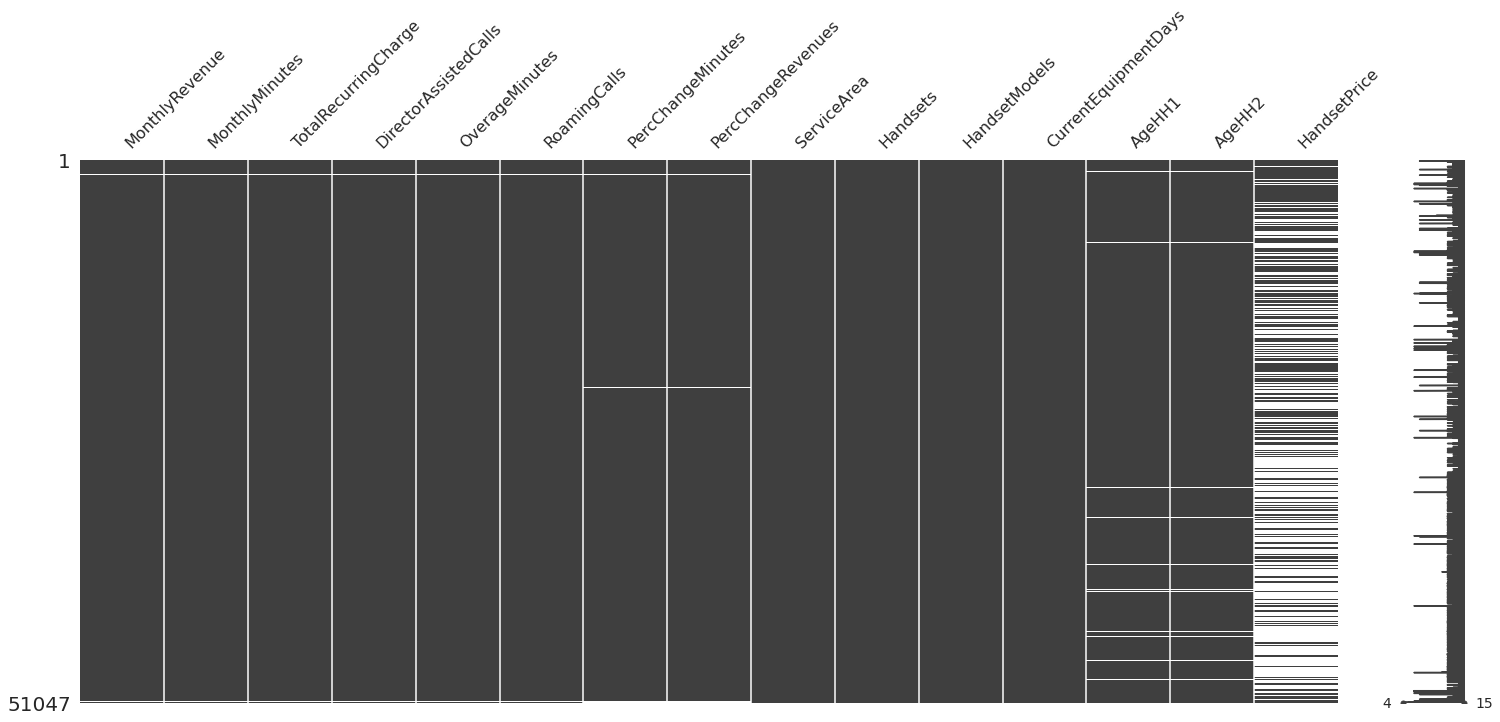

In [23]:
msno.matrix(train_missings);

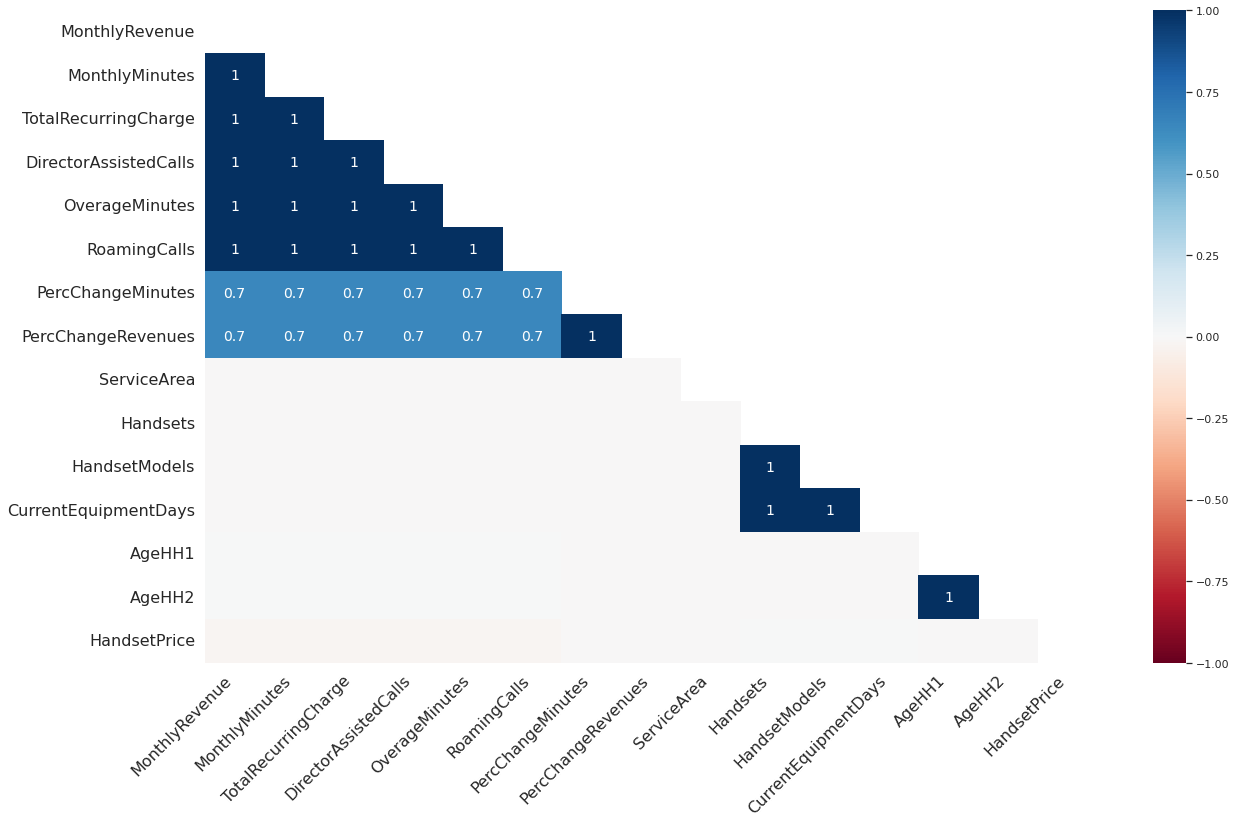

In [24]:
msno.heatmap(train_missings); #A value near -1 means if one variable appears then the other variable is very likely to be missing.
                    #A value near 0 means there is no dependence between the occurrence of missing values of two variables.
                    #A value near 1 means if one variable appears then the other variable is very likely to be present.


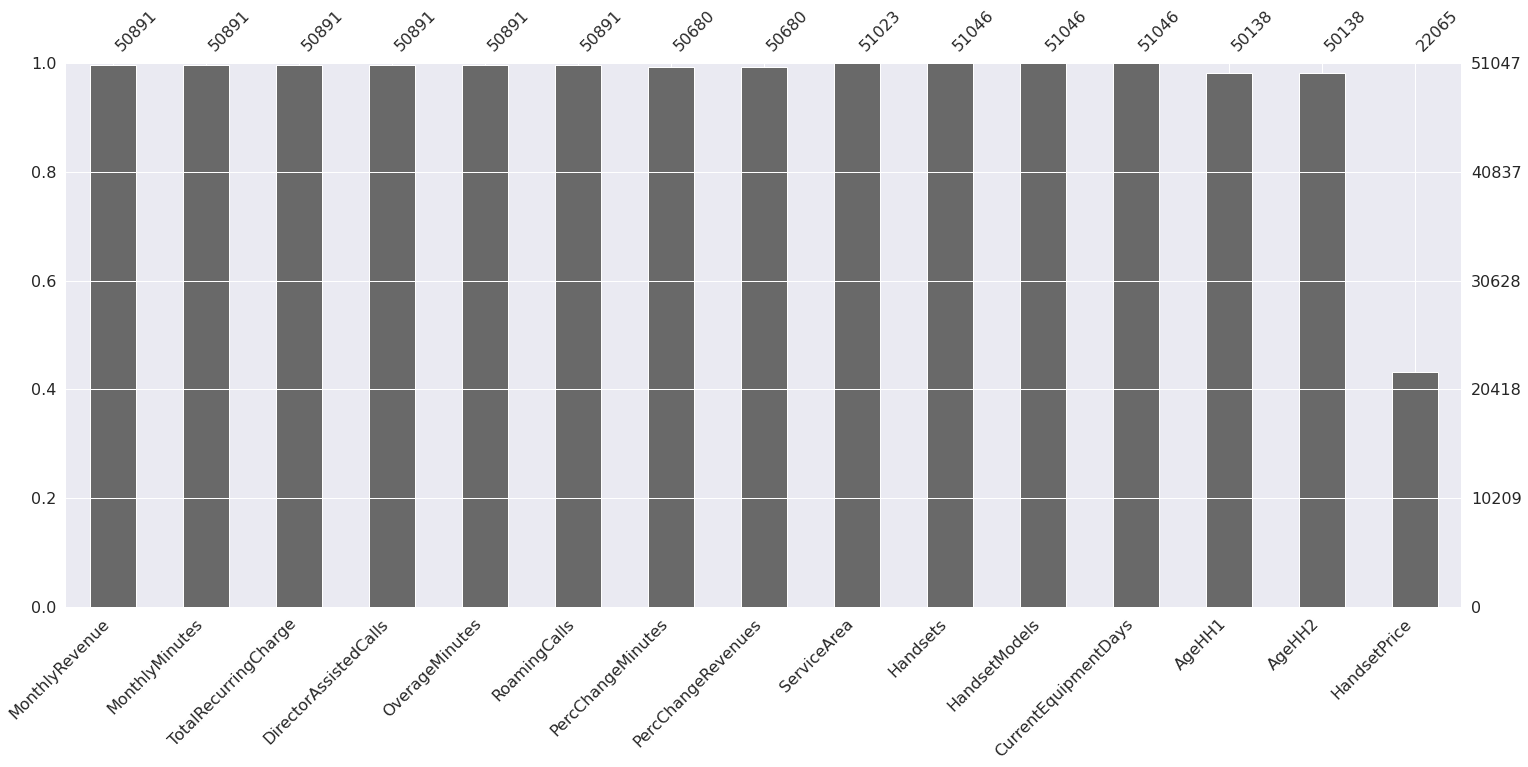

In [25]:
msno.bar(train_missings);

In [26]:
train_missings.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,1.805646,1.558751,380.545841,31.338127,21.144142
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,1.331173,0.905932,253.801982,22.094635,23.931368
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,1.000000,1.000000,-5.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,1.000000,1.000000,205.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,1.000000,1.000000,329.000000,36.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,2.000000,2.000000,515.000000,48.000000,42.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,24.000000,15.000000,1812.000000,99.000000,99.000000


In [27]:
def values_table(train_missings):
        mis_val = train_missings.isnull().sum()
        mis_val_percent = 100 * train_missings.isnull().sum() / len(train_missings)
        mean=train_missings.mean()
        median=train_missings.median()
        total=train_missings.count()
        zeros=train_missings[train_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Train Missing Values', 1 : '% of Train Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = train_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Train Total Values', ascending=False).round(1)
        print ("There are " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " rows in the dataset.\n"      
             + str(table.shape[0]) + " of these columns have missing variables.")
        return table

values_table(train_missings)

There are 58 columns and 51047 rows in the dataset.
15 of these columns have missing variables.


,Train Missing Values,% of Train Total Values,Mean,Median,# of Values,# of Zeros,Data Type
HandsetPrice,28982,56.8,NaN,60.0,22065,0,object
AgeHH1,909,1.8,31.3,36.0,50138,13917,float64
AgeHH2,909,1.8,21.1,0.0,50138,26087,float64
PercChangeMinutes,367,0.7,-11.5,-5.0,50680,1124,float64
PercChangeRevenues,367,0.7,-1.2,-0.3,50680,5818,float64
MonthlyRevenue,156,0.3,58.8,48.5,50891,6,float64
MonthlyMinutes,156,0.3,525.7,366.0,50891,723,float64
TotalRecurringCharge,156,0.3,46.8,45.0,50891,160,float64
DirectorAssistedCalls,156,0.3,0.9,0.2,50891,24512,float64
OverageMinutes,156,0.3,40.0,3.0,50891,23262,float64


In [28]:
train_1=df.copy()


In [29]:
churn=train_1[train_1['Churn']=='Yes']
non_churn= train_1[train_1['Churn']=='No']
churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14503.000000,14503.000000,14711.000000,14711.000000,...,14711.000000,14711.000000,14462.000000,14462.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000
mean,57.995041,483.827471,44.529882,0.826793,42.529472,1.404358,-25.458388,-0.497111,5.792638,3.990538,...,1.501733,421.903881,30.306043,20.445927,0.058392,0.026103,0.046904,4.261845,0.043641,0.227721
std,44.505934,504.634392,22.990134,1.954381,93.172832,11.106095,269.493300,46.652335,8.834394,10.691814,...,0.863085,259.940076,22.013043,23.536945,0.258222,0.169771,0.240896,3.164527,0.297278,1.318878
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,...,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.520000,132.000000,30.000000,0.000000,0.000000,0.000000,-101.000000,-7.750000,0.700000,0.000000,...,1.000000,249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.520000,330.000000,44.000000,0.250000,4.000000,0.000000,-11.000000,-0.300000,3.000000,1.000000,...,1.000000,366.000000,34.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,69.950000,667.000000,55.000000,0.740000,46.000000,0.300000,54.000000,1.700000,7.300000,3.300000,...,2.000000,564.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,861.110000,5410.000000,338.000000,45.790000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,...,14.000000,1779.000000,98.000000,99.000000,4.000000,3.000000,9.000000,9.000000,9.000000,143.000000


In [30]:
non_churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36177.000000,36177.000000,36336.000000,36336.000000,...,36335.000000,36335.000000,35676.000000,35676.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000
mean,59.173538,542.546483,47.759117,0.922870,39.017379,1.168345,-5.971335,-1.470553,6.100094,4.124188,...,1.581836,363.801156,31.756503,21.427178,0.028622,0.015109,0.054161,4.349901,0.058069,0.157612
std,44.504027,538.816505,24.125276,2.329606,97.916838,9.246760,252.341813,36.349778,9.126058,11.048418,...,0.921723,249.334338,22.114216,24.083977,0.180685,0.129644,0.330772,3.127216,0.412795,0.486571
min,-6.170000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.100000,170.000000,30.000000,0.000000,0.000000,0.000000,-78.000000,-6.800000,1.000000,0.000000,...,1.000000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,48.815000,381.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,...,1.000000,310.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,71.617500,743.000000,60.000000,0.990000,39.000000,0.300000,70.000000,1.600000,7.700000,3.700000,...,2.000000,493.000000,48.000000,44.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,...,15.000000,1812.000000,99.000000,98.000000,3.000000,3.000000,35.000000,9.000000,25.000000,10.000000


In [31]:
train_1['MonthlyRevenue'].fillna(train_1.groupby('Churn')['MonthlyRevenue'].transform('median'), inplace=True)

In [32]:
#Too many missing variables (56.4%) so we dropped it

train_1.drop('HandsetPrice',axis=1, inplace=True)


In [33]:
train_1.drop('MadeCallToRetentionTeam',axis=1, inplace=True)


In [34]:
train_1.drop('MaritalStatus',axis=1, inplace=True)


In [35]:
train_1.drop('Homeownership',axis=1, inplace=True)


In [36]:
#Although HandsetModels and Handsets appear numeric, they are categorical variables, so it is more correct to fill them with mode.
train_1[train_1['Handsets'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']] 

,HandsetModels,Handsets,CurrentEquipmentDays
38702,NaN,NaN,NaN


In [37]:
print("Handsets:",train_1.Handsets.mode()[0])
print("HandsetModels:",train_1.HandsetModels.mode()[0])
print("CurrentEquipmentDays:",train_1.CurrentEquipmentDays.mode()[0])

Handsets: 1.0
HandsetModels: 1.0
CurrentEquipmentDays: 202.0


In [38]:
train_1['Handsets'].fillna(train_1['Handsets'].mode()[0],inplace=True)

In [39]:
train_1['HandsetModels'].fillna(train_1['HandsetModels'].mode()[0],inplace=True)

In [40]:
train_1['CurrentEquipmentDays'].value_counts()

202.0     159
313.0     156
212.0     149
199.0     147
308.0     147
         ... 
1438.0      1
1381.0      1
1443.0      1
1276.0      1
1219.0      1
Name: CurrentEquipmentDays, Length: 1438, dtype: int64

In [41]:
train_1['CurrentEquipmentDays'].fillna(train_1['CurrentEquipmentDays'].mode()[0],inplace=True)

In [42]:
train_1['ServiceArea'].fillna(train_1['ServiceArea'].mode()[0],inplace=True)


In [43]:
train_1['AgeHH1'].fillna(value=0,inplace=True)


In [44]:
train_1['AgeHH2'].fillna(value=0,inplace=True)


In [45]:
display(train_1.groupby(['Churn'],as_index=False)['MonthlyMinutes'].median().style.hide_index())

Churn,MonthlyMinutes
No,381.000000
Yes,330.000000


In [46]:
train_1['MonthlyMinutes'].fillna(train_1.groupby('Churn')['MonthlyMinutes'].transform('median'), inplace=True)

In [47]:
train_1['TotalRecurringCharge'].fillna(train_1['TotalRecurringCharge'].median(),inplace=True)


In [48]:
train_1['PercChangeRevenues'].fillna(train_1['PercChangeRevenues'].median(),inplace=True)


In [49]:
train_1['PercChangeMinutes'].fillna(train_1['PercChangeMinutes'].median(),inplace=True)


In [50]:
train_1['RoamingCalls'].fillna(value=0,inplace=True)


In [51]:
train_1['OverageMinutes'].fillna(value=0,inplace=True)


In [52]:
train_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)


In [53]:
train_1.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

# **Label Encoding**

In [54]:
train_df=train_1.copy()
for i in train_df.columns:
      if train_df[i].dtype=='object':
            print(pd.DataFrame(train_df[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1708
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
OHIRAV330            1
OMANEW515            1
KCYHES316            1
AIRGEO843            1
NCRDNN910            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     HasCreditCard
Yes          34503
No           16544
     NewCellphoneUs

In [55]:
train_df.drop(columns = ['CreditRating'],axis = 1,inplace= True)
train_df.drop(columns = ['ActiveSubs'],axis=1,inplace= True)
train_df.drop(columns = ['UniqueSubs'],axis=1,inplace= True)
train_df.drop(columns = ['ServiceArea'],axis=1,inplace= True)

In [56]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
def FunLabelEncoder(train_df):
    for c in train_df.columns:
        if train_df.dtypes[c] == object:
            enc.fit(train_df[c].astype(str))
            train_df[c] = enc.transform(train_df[c].astype(str))
    return train_df

In [57]:
train_df = FunLabelEncoder(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int64  
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

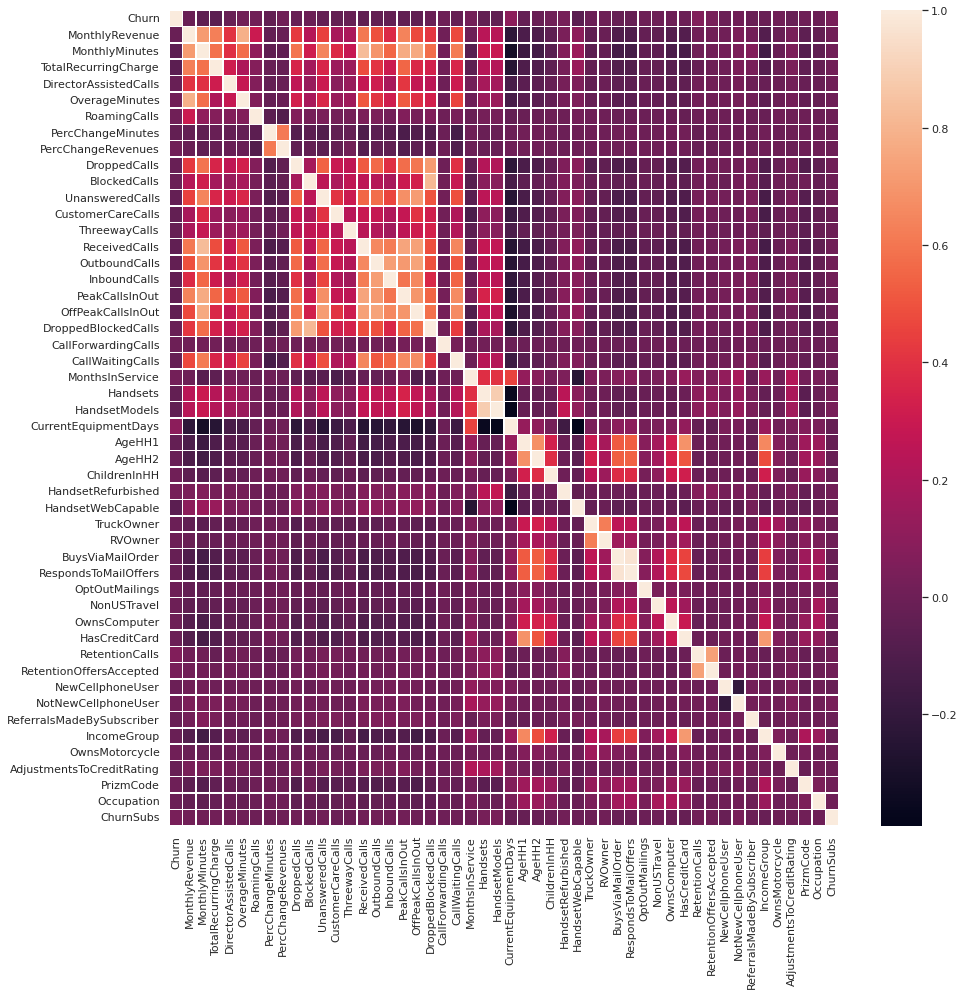

In [58]:
cor = train_df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor, fmt=".4f", linewidths=0.5, ax=ax);

In [59]:
#train_df.to_csv('df_cleaned_median_imputed.csv',index=False)

## Feature Scaling






In [60]:
y = train_df['Churn']
X= train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,PrizmCode,Occupation,ChurnSubs
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,0,4,0,0,2,4,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,1,0,0,5,0,0,2,4,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,1,0,0,6,0,0,3,1,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,1,0,0,6,0,0,0,3,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,1,0,9,0,1,0,4,0


In [61]:
y

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int64

# Train/Test Split,Feature Scaling

In [62]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

columns = X_train.columns

scaler = QuantileTransformer()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_valid[X_valid.columns] = scaler.transform(X_valid[X_valid.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [63]:


from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
!pip install pytorch_tabnet
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingWarmRestarts
from pytorch_tabnet.tab_model import TabNetClassifier,TabNetRegressor
import torch

from scipy import stats
from scipy.stats import norm
from joblib import Parallel, delayed

import shutil
import glob

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold


from pytorch_tabnet.tab_model import TabNetRegressor

import torch
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingWarmRestarts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 618 kB/s 


In [64]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,40837.0,0.499998,0.288681,0.0,0.249821,0.499928,0.750023,1.0
MonthlyMinutes,40837.0,0.499888,0.288875,0.0,0.249750,0.500501,0.750250,1.0
TotalRecurringCharge,40837.0,0.500054,0.287545,0.0,0.206206,0.519520,0.773774,1.0
DirectorAssistedCalls,40837.0,0.382280,0.385795,0.0,0.000000,0.551552,0.769269,1.0
OverageMinutes,40837.0,0.394746,0.381218,0.0,0.000000,0.505005,0.748248,1.0
RoamingCalls,40837.0,0.264977,0.394586,0.0,0.000000,0.000000,0.760761,1.0
PercChangeMinutes,40837.0,0.500010,0.288677,0.0,0.249750,0.502002,0.750250,1.0
PercChangeRevenues,40837.0,0.500027,0.288468,0.0,0.250250,0.505506,0.749249,1.0
DroppedCalls,40837.0,0.488400,0.305842,0.0,0.228228,0.497998,0.749750,1.0
BlockedCalls,40837.0,0.462562,0.335188,0.0,0.000000,0.492993,0.751251,1.0


In [65]:
X_valid.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,5105.0,0.500832,0.289889,0.000032,0.247748,0.504004,0.752144,0.999385
MonthlyMinutes,5105.0,0.497460,0.289384,0.000000,0.244244,0.492859,0.751084,0.999515
TotalRecurringCharge,5105.0,0.500512,0.291134,0.000546,0.206206,0.519520,0.773774,0.999499
DirectorAssistedCalls,5105.0,0.388671,0.387313,0.000000,0.000000,0.551552,0.769269,0.999062
OverageMinutes,5105.0,0.395316,0.380991,0.000000,0.000000,0.505005,0.748248,0.999004
RoamingCalls,5105.0,0.253845,0.389595,0.000000,0.000000,0.000000,0.731732,0.999354
PercChangeMinutes,5105.0,0.497115,0.288389,0.000000,0.245746,0.492492,0.744745,0.999007
PercChangeRevenues,5105.0,0.504872,0.289622,0.000754,0.251251,0.505506,0.757257,0.999652
DroppedCalls,5105.0,0.488306,0.303994,0.000000,0.228228,0.497998,0.738238,1.000000
BlockedCalls,5105.0,0.460130,0.332530,0.000000,0.000000,0.492993,0.732733,0.999173


In [66]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,5105.0,0.501308,0.286494,0.000627,0.255656,0.494494,0.750296,0.999049
MonthlyMinutes,5105.0,0.501045,0.284236,0.000000,0.261261,0.493994,0.749082,0.998381
TotalRecurringCharge,5105.0,0.502543,0.286994,0.000910,0.206206,0.519520,0.773774,0.999550
DirectorAssistedCalls,5105.0,0.392559,0.385798,0.000000,0.000000,0.551552,0.769269,0.999164
OverageMinutes,5105.0,0.393965,0.380787,0.000000,0.000000,0.489489,0.748248,0.999144
RoamingCalls,5105.0,0.259058,0.392613,0.000000,0.000000,0.000000,0.731732,0.999235
PercChangeMinutes,5105.0,0.508249,0.286378,0.000325,0.265766,0.517518,0.750250,0.999179
PercChangeRevenues,5105.0,0.502364,0.289256,0.000735,0.246246,0.505506,0.757257,0.999007
DroppedCalls,5105.0,0.487277,0.302079,0.000000,0.275776,0.497998,0.738238,0.999388
BlockedCalls,5105.0,0.465670,0.331734,0.000000,0.000000,0.492993,0.751251,0.999119


#SVM Hyperparameter tuning

In [67]:
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [75]:
#SVM with default parameters

svm_model=SVC()
svm_model.fit(X_train,y_train)


SVC()

SVM Validation result for the default parameters


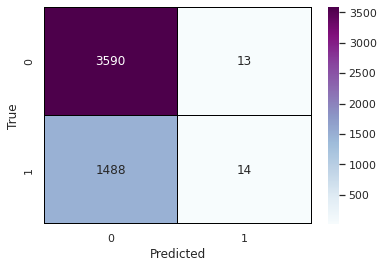

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      3603
           1       0.52      0.01      0.02      1502

    accuracy                           0.71      5105
   macro avg       0.61      0.50      0.42      5105
weighted avg       0.65      0.71      0.59      5105



In [76]:
#SVM result with default parameters 

y_pred_valid = svm_model.predict(X_valid)
#Validation result
conf = confusion_matrix(y_valid, y_pred_valid)
print("SVM Validation result for the default parameters")
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 
    

print(classification_report(y_valid, y_pred_valid))

In [ ]:
# # List of C values
# C_range = [1.e-10, 1.e-09, 1.e-08, 1.e-07 ,1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,  1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05 ] 
# print(f'The list of values for C are {C_range}')
# # List of gamma values
# gamma_range = [1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]
# print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
The list of values for gamma are [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]


In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Define the search space
# param_grid = { 
#     # Regularization parameter.
#     "C": C_range,
#     # Kernel type
#     "kernel": ['rbf'],
#     # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#     "gamma": gamma_range+['scale']
#     }

param_grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["rbf"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}



# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# Define random search
random_search = RandomizedSearchCV(estimator=svc, 
                           param_distributions=param_grid, 
                           n_iter=5,
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_train, y_train)
# Print grid search summary
random_result

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'degree': [1, 3, 5, 7],
                                        'gamma': [0.01, 1], 'kernel': ['rbf']},
                   refit='accuracy', scoring=['accuracy'])

In [69]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {random_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {random_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the validation dataset is {random_search.score(X_valid, y_valid):.4f}')

The best accuracy score for the training dataset is 0.7118
The best hyperparameters are {'kernel': 'rbf', 'gamma': 0.01, 'degree': 7, 'C': 1}
The accuracy score for the validation dataset is 0.7058


####Refit SVM using the best parameters

In [77]:
#model with the return parameters
model_tuned=SVC(kernel='rbf',
                C= 1,
              gamma='scale',
              degree = 7)
model_tuned.fit(X_train,y_train)


SVC(C=1, degree=7)

SVM Validation result with tuned parameters


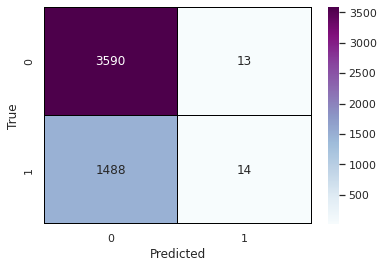

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      3603
           1       0.52      0.01      0.02      1502

    accuracy                           0.71      5105
   macro avg       0.61      0.50      0.42      5105
weighted avg       0.65      0.71      0.59      5105



In [79]:
#SVM result with tuned parameters 

y_pred_tuned_valid = model_tuned.predict(X_valid)
#Validation result
conf = confusion_matrix(y_valid, y_pred_tuned_valid)
print("SVM Validation result with tuned parameters")
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 
    

print(classification_report(y_valid, y_pred_tuned_valid))

#Oversampling SVM

In [80]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smote = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_over)
print('After',counter)

Before Counter({0: 29068, 1: 11769})
After Counter({1: 29068, 0: 29068})


In [81]:
svm_over=SVC(kernel='rbf',
                C= 1,
              gamma='scale',
              degree = 7)
svm_over.fit(X_train_over,y_train_over)

SVC(C=1, degree=7)

SVM Validation result with Oversampling


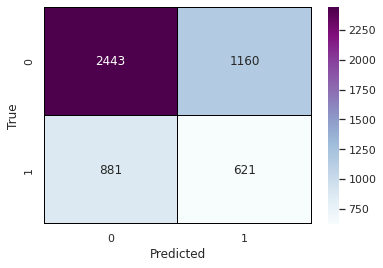

              precision    recall  f1-score   support

           0       0.73      0.68      0.71      3603
           1       0.35      0.41      0.38      1502

    accuracy                           0.60      5105
   macro avg       0.54      0.55      0.54      5105
weighted avg       0.62      0.60      0.61      5105



In [82]:
#SVM result with oversampling 

y_pred_over = svm_over.predict(X_valid)
#Validation result
conf = confusion_matrix(y_valid, y_pred_over)
print("SVM Validation result with Oversampling")
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 
    

print(classification_report(y_valid, y_pred_over))

#Undersampling

In [83]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# Undersampling the train dataset using RandomUnderSampler
under_sample = RandomUnderSampler()

X_train_under, y_train_under = under_sample.fit_resample(X_train, y_train)

counter = Counter(y_train_under)
print('After',counter)

Before Counter({0: 29068, 1: 11769})
After Counter({0: 11769, 1: 11769})


In [84]:
svm_under=SVC(kernel='rbf',
                C= 1,
              gamma='scale',
              degree = 7)
svm_under.fit(X_train_under,y_train_under)

SVC(C=1, degree=7)

SVM Validation result with Undersampling


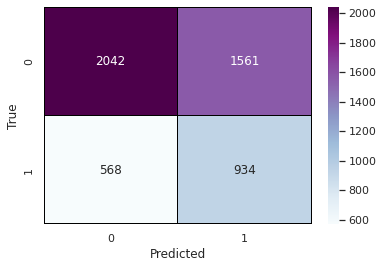

              precision    recall  f1-score   support

           0       0.78      0.57      0.66      3603
           1       0.37      0.62      0.47      1502

    accuracy                           0.58      5105
   macro avg       0.58      0.59      0.56      5105
weighted avg       0.66      0.58      0.60      5105



In [85]:
#SVM result with Undersampling 

y_pred_under = svm_under.predict(X_valid)
#Validation result
conf = confusion_matrix(y_valid, y_pred_under)
print("SVM Validation result with Undersampling")
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 
    

print(classification_report(y_valid, y_pred_under))

#XGBoost Hyperparameter tuning

In [90]:
from sklearn.metrics import accuracy_score
import optuna
def objective_xgb(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'auc',
        'use_label_encoder': False
    }


    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_valid)

    # Evaluate predictions
    accuracy = accuracy_score(y_valid, y_pred)
    return accuracy


In [91]:
study = optuna.create_study(direction='maximize')

[I 2022-11-28 12:28:16,007] A new study created in memory with name: no-name-b27cfabb-c5b0-498c-b20a-f319566779a3


In [92]:
study.optimize(objective_xgb, n_trials=20)

[I 2022-11-28 12:28:27,380] Trial 0 finished with value: 0.7100881488736532 and parameters: {'max_depth': 5, 'learning_rate': 0.038652953217688246, 'n_estimators': 355, 'min_child_weight': 1, 'gamma': 3.289292348755559e-05, 'subsample': 0.09933258244884967, 'colsample_bytree': 0.09819679216272705, 'reg_alpha': 0.01737877841890667, 'reg_lambda': 0.027288105476119616}. Best is trial 0 with value: 0.7100881488736532.
[I 2022-11-28 12:29:08,944] Trial 1 finished with value: 0.7122428991185112 and parameters: {'max_depth': 9, 'learning_rate': 0.07687742646123634, 'n_estimators': 378, 'min_child_weight': 5, 'gamma': 0.032894764254649954, 'subsample': 0.9666463721305262, 'colsample_bytree': 0.52835860749628, 'reg_alpha': 0.01428011802136718, 'reg_lambda': 9.518536667891383e-05}. Best is trial 1 with value: 0.7122428991185112.
[I 2022-11-28 12:29:13,997] Trial 2 finished with value: 0.7002938295788442 and parameters: {'max_depth': 2, 'learning_rate': 0.9751269516451762, 'n_estimators': 289, 'm

In [93]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.7126346718903036
  Params: 
    max_depth: 7
    learning_rate: 0.01403862595914253
    n_estimators: 438
    min_child_weight: 7
    gamma: 0.8969707468796103
    subsample: 0.337492912463154
    colsample_bytree: 0.36601797543417997
    reg_alpha: 0.7765371672184801
    reg_lambda: 4.704859136821382e-06


####Refit XGB using best parameters

In [98]:
xgb_model = XGBClassifier(colsample_bytree=0.6268107915286736, gamma=2.9685263295407745e-08,
              learning_rate=0.0001, max_depth=7,
              min_child_weight=7, n_estimators=438,
              reg_alpha=0.7765371672184801, reg_lambda=4.704859136821382e-06,
              subsample=0.337492912463154)
evalset = [(X_train, y_train), (X_valid,y_valid)]
xgb_model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.693286	validation_1-logloss:0.693126
[1]	validation_0-logloss:0.693278	validation_1-logloss:0.69312
[2]	validation_0-logloss:0.693272	validation_1-logloss:0.693094
[3]	validation_0-logloss:0.693249	validation_1-logloss:0.693061
[4]	validation_0-logloss:0.693212	validation_1-logloss:0.693042
[5]	validation_0-logloss:0.693161	validation_1-logloss:0.69302
[6]	validation_0-logloss:0.693125	validation_1-logloss:0.693
[7]	validation_0-logloss:0.693095	validation_1-logloss:0.692983
[8]	validation_0-logloss:0.693075	validation_1-logloss:0.692962
[9]	validation_0-logloss:0.69306	validation_1-logloss:0.692936
[10]	validation_0-logloss:0.693008	validation_1-logloss:0.692915
[11]	validation_0-logloss:0.69296	validation_1-logloss:0.692895
[12]	validation_0-logloss:0.69291	validation_1-logloss:0.692873
[13]	validation_0-logloss:0.692856	validation_1-logloss:0.692854
[14]	validation_0-logloss:0.692817	validation_1-logloss:0.692834
[15]	validation_0-logloss:0.692781	validati

XGBClassifier(colsample_bytree=0.6268107915286736, gamma=2.9685263295407745e-08,
              learning_rate=0.0001, max_depth=7, min_child_weight=7,
              n_estimators=438, reg_alpha=0.7765371672184801,
              reg_lambda=4.704859136821382e-06, subsample=0.337492912463154)

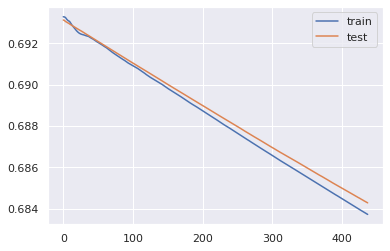

In [99]:
results = xgb_model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [100]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {xgb_model.score(X_train,y_train):.4f}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the validation dataset is {xgb_model.score(X_valid, y_valid):.4f}')

The best accuracy score for the training dataset is 0.7174
The accuracy score for the validation dataset is 0.7085


####XGB with Oversampling

In [178]:
xgb_model_over = XGBClassifier(colsample_bytree=0.6268107915286736, gamma=2.9685263295407745e-08,
              learning_rate=0.0001, max_depth=7,
              min_child_weight=7, n_estimators=438,
              reg_alpha=0.7765371672184801, reg_lambda=4.704859136821382e-06,
              subsample=0.337492912463154)
xgb_model_over.fit(X_train_over, y_train_over)

XGBClassifier(colsample_bytree=0.6268107915286736, gamma=2.9685263295407745e-08,
              learning_rate=0.0001, max_depth=7, min_child_weight=7,
              n_estimators=438, reg_alpha=0.7765371672184801,
              reg_lambda=4.704859136821382e-06, subsample=0.337492912463154)

XGBoost Validation result with Oversampling


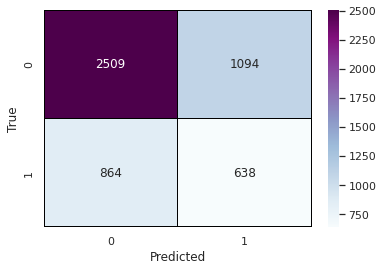

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      3603
           1       0.37      0.42      0.39      1502

    accuracy                           0.62      5105
   macro avg       0.56      0.56      0.56      5105
weighted avg       0.63      0.62      0.62      5105



In [181]:
#XGB result with oversampling 

y_pred_over_xgb= xgb_model_over.predict(X_valid)
#Validation result
conf = confusion_matrix(y_valid, y_pred_over_xgb)
print("XGBoost Validation result with Oversampling")
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 
    

print(classification_report(y_valid, y_pred_over_xgb))

####XGB with undersampling

In [179]:
xgb_model_under = XGBClassifier(colsample_bytree=0.6268107915286736, gamma=2.9685263295407745e-08,
              learning_rate=0.0001, max_depth=7,
              min_child_weight=7, n_estimators=438,
              reg_alpha=0.7765371672184801, reg_lambda=4.704859136821382e-06,
              subsample=0.337492912463154)
xgb_model_under.fit(X_train_under, y_train_under)

XGBClassifier(colsample_bytree=0.6268107915286736, gamma=2.9685263295407745e-08,
              learning_rate=0.0001, max_depth=7, min_child_weight=7,
              n_estimators=438, reg_alpha=0.7765371672184801,
              reg_lambda=4.704859136821382e-06, subsample=0.337492912463154)

XGBoost Validation result with Undersampling


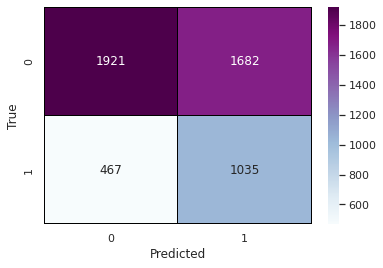

              precision    recall  f1-score   support

           0       0.80      0.53      0.64      3603
           1       0.38      0.69      0.49      1502

    accuracy                           0.58      5105
   macro avg       0.59      0.61      0.57      5105
weighted avg       0.68      0.58      0.60      5105



In [180]:
#XGB result with Undersampling 

y_pred_under_xgb= xgb_model_under.predict(X_valid)
#Validation result
conf = confusion_matrix(y_valid, y_pred_under_xgb)
print("XGBoost Validation result with Undersampling")
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 
    

print(classification_report(y_valid, y_pred_under_xgb))

# Multilayer Perceptron hyperparameter tuning

In [157]:
#Training with higher number of layers

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [158]:
y_pred = mlp_clf.predict(X_valid)

print('Accuracy: {:.2f}'.format(accuracy_score(y_valid, y_pred)))

Accuracy: 0.61


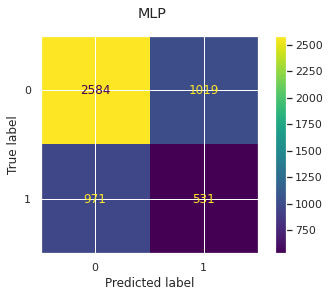

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

fig = plot_confusion_matrix(mlp_clf, X_valid, y_valid, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("MLP")
plt.show()

In [164]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [165]:
grid = RandomizedSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

{'solver': 'adam', 'max_iter': 50, 'learning_rate': 'constant', 'hidden_layer_sizes': (150, 100, 50), 'alpha': 0.05, 'activation': 'relu'}


In [166]:
grid_predictions = grid.predict(X_valid) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))


Accuracy: 0.67


In [189]:
from sklearn.neural_network import MLPClassifier

def objective(trial):
    momentum = trial.suggest_float("momentum", 0.0, 1.0)
    learning_rate_init = trial.suggest_float(
        "learning_rate_init", 1e-5, 1e-3, log=True
    )
    power_t = trial.suggest_float("power_t", 0.2, 0.8, step=0.1)
    clf = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        momentum=momentum,
        learning_rate_init=learning_rate_init,
        solver="sgd",
        random_state=0,
        power_t=power_t,
    )
    clf.fit(X_train, y_train)

    return clf.score(X_valid, y_valid)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)

[I 2022-11-28 16:36:31,073] A new study created in memory with name: no-name-10a13f7a-1c19-4d6c-86ba-f8ef1f164f1a
[I 2022-11-28 16:37:01,369] Trial 0 finished with value: 0.7057786483839373 and parameters: {'momentum': 0.08805761910276733, 'learning_rate_init': 0.0004657248785359015, 'power_t': 0.7}. Best is trial 0 with value: 0.7057786483839373.
[I 2022-11-28 16:37:35,520] Trial 1 finished with value: 0.7057786483839373 and parameters: {'momentum': 0.3992695886924992, 'learning_rate_init': 0.00047996015302868763, 'power_t': 0.30000000000000004}. Best is trial 0 with value: 0.7057786483839373.
[I 2022-11-28 16:38:00,525] Trial 2 finished with value: 0.7057786483839373 and parameters: {'momentum': 0.8568025230720266, 'learning_rate_init': 3.459459364053089e-05, 'power_t': 0.6000000000000001}. Best is trial 0 with value: 0.7057786483839373.


In [190]:
trial=study.best_trial
print("Best Tuning Parameters : {} \n with accuracy of : {:.2f} %".format(trial.params,trial.value))

Best Tuning Parameters : {'momentum': 0.08805761910276733, 'learning_rate_init': 0.0004657248785359015, 'power_t': 0.7} 
 with accuracy of : 0.71 %


####Oversampling with MLP

In [197]:
mlp_model_over=MLPClassifier(solver='adam',momentum =0.08805761910276733, max_iter= 50,learning_rate_init = 0.0004657248785359015,power_t= 0.7)
mlp_model_over.fit(X_train_over,y_train_over)

MLPClassifier(learning_rate_init=0.0004657248785359015, max_iter=50,
              momentum=0.08805761910276733, power_t=0.7)

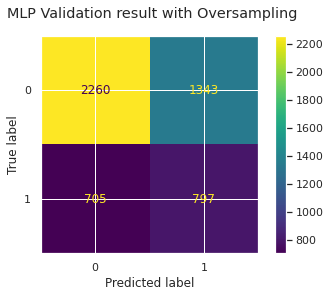

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      3603
           1       0.37      0.53      0.44      1502

    accuracy                           0.60      5105
   macro avg       0.57      0.58      0.56      5105
weighted avg       0.65      0.60      0.61      5105



In [198]:
#MLP result with oversampling 

y_pred_over_mlp= mlp_model_over.predict(X_valid)
#Validation result

fig = plot_confusion_matrix(mlp_model_over, X_valid, y_valid, display_labels=mlp_model_over.classes_)
fig.figure_.suptitle("MLP Validation result with Oversampling")
# save the figure
plt.savefig('MLP Validation result with Oversampling.png', dpi=300, bbox_inches='tight')
plt.show()

    

print(classification_report(y_valid, y_pred_over_mlp))

#### Undersampling with MLP

In [175]:
mlp_model_under=MLPClassifier(solver='adam', max_iter= 50, learning_rate= 'constant', hidden_layer_sizes =(150, 100, 50), alpha= 0.05, activation = 'relu')
mlp_model_under.fit(X_train_under,y_train_under)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(150, 100, 50), max_iter=50)

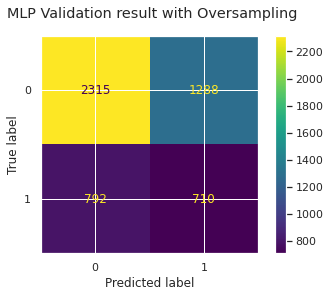

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      3603
           1       0.36      0.47      0.41      1502

    accuracy                           0.59      5105
   macro avg       0.55      0.56      0.55      5105
weighted avg       0.63      0.59      0.61      5105



In [187]:
#MLP result with undersampling 

y_pred_under_mlp= mlp_model_under.predict(X_valid)
#Validation result
conf = confusion_matrix(y_valid, y_pred_under_mlp)
print("MLP Validation result with Undersampling")
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 


print(classification_report(y_valid, y_pred_under_mlp))